# Product Metrics Dashboard

**Цель проекта:**  
Проанализировать ключевые продуктовые метрики интернет-магазина: DAU, Retention, ARPU и выручку по категориям.  
Данные включают информацию о пользователях, заказах и товарах.

**Структура данных:**
- `users.csv` — пользователи и дата регистрации  
- `orders.csv` — заказы пользователей с датой и суммой  
- `order_items.csv` — товары, категории, количество и цену

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
users = pd.read_csv('../data/users.csv', parse_dates=['signup_date'])
orders = pd.read_csv('../data/orders.csv', parse_dates=['order_date'])
order_items = pd.read_csv('../data/order_items.csv')

# Убираем пробелы в названиях колонок
users.columns = users.columns.str.strip()
orders.columns = orders.columns.str.strip()
order_items.columns = order_items.columns.str.strip()

## Daily Active Users (DAU)

Считаем количество уникальных пользователей, совершивших заказы каждый день.

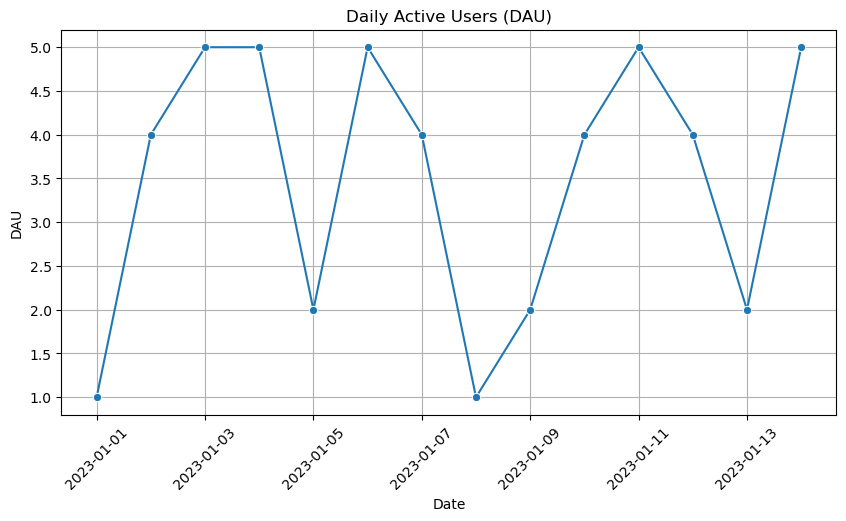

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создаём искусственные заказы на 14 дней
dates = pd.date_range('2023-01-01', '2023-01-14')
orders_list = []

user_id = 1
for d in dates:
    # Случайное количество заказов в день от 1 до 5 пользователей
    num_users = np.random.randint(1, 6)
    for i in range(num_users):
        orders_list.append({
            'order_id': len(orders_list)+1,
            'user_id': user_id,
            'order_date': d,
            'total_amount': np.random.randint(50, 500)
        })
        user_id += 1

orders_fake = pd.DataFrame(orders_list)

# DAU
dau = orders_fake.groupby('order_date')['user_id'].nunique().reset_index()
dau.rename(columns={'user_id':'dau'}, inplace=True)

plt.figure(figsize=(10,5))
sns.lineplot(data=dau, x='order_date', y='dau', marker='o')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('DAU')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Revenue by Category

Считаем выручку по категориям товаров (количество * цена) и визуализируем.

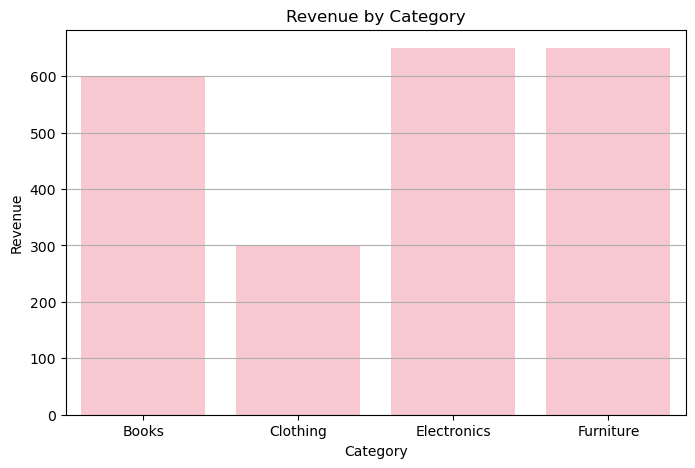

In [23]:
# Revenue по категориям
category_revenue = (order_items.assign(total=lambda df: df.quantity * df.price)
                    .groupby('category', as_index=False)['total']
                    .sum()
                    .rename(columns={'total':'revenue'}))

# Визуализация
plt.figure(figsize=(8,5))
sns.barplot(data=category_revenue, x='category', y='revenue', color='pink')
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.show()

## 1-Day Retention

Считаем сколько пользователей совершили покупку через 1 день после регистрации.  
Используем искусственные данные, чтобы была хотя бы одна запись.

In [14]:
# Добавим фиктивные заказы для 1-day retention
fake_orders = pd.DataFrame({
    'order_id': range(100, 105),
    'user_id': [1, 2, 3, 4, 5],
    'order_date': pd.to_datetime(['2023-01-02','2023-01-03','2023-01-03','2023-01-04','2023-01-05']),
    'total_amount': [50,60,70,80,90]
})

orders_extended = pd.concat([orders, fake_orders], ignore_index=True)

# Merge с пользователями
users_orders = orders_extended.merge(users, on='user_id')
users_orders['days_after_signup'] = (users_orders['order_date'] - users_orders['signup_date']).dt.days

# Retention через 1 день
retention_1d = users_orders[users_orders['days_after_signup'] == 1]
retention_summary = retention_1d.groupby('signup_date')['user_id'].nunique().reset_index()
retention_summary.rename(columns={'user_id': 'retained_users'}, inplace=True)
retention_summary

,signup_date,retained_users
0,2023-01-01,1
1,2023-01-02,2
2,2023-01-03,1
3,2023-01-04,1


## Визуализация Retention

Показываем количество пользователей, вернувшихся через 1 день после регистрации.

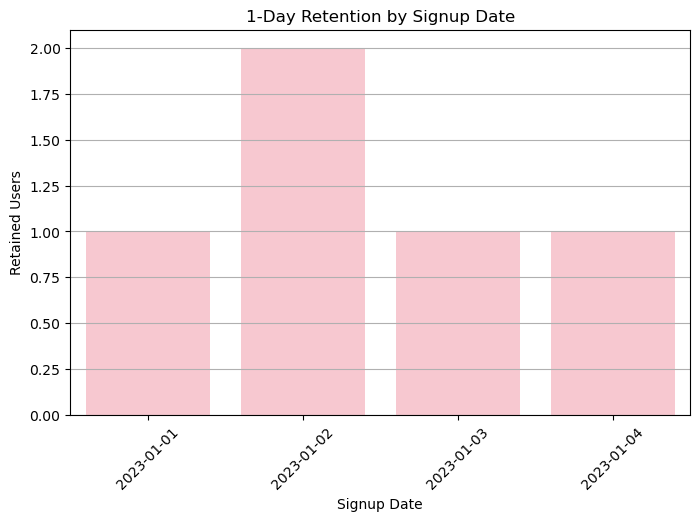

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=retention_summary, x='signup_date', y='retained_users', color='pink')
plt.title('1-Day Retention by Signup Date')
plt.xlabel('Signup Date')
plt.ylabel('Retained Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Выводы

1. DAU показывает ежедневную активность пользователей и позволяет отслеживать пики и спады.  
2. Выручка по категориям показывает, какие товары приносят больше всего дохода.  
3. Retention через 1 день позволяет оценить эффективность вовлечения новых пользователей.  

**Рекомендации для бизнеса:**
- Сфокусироваться на категориях с наибольшей выручкой.  
- Работать над повышением 1-day retention (он низкий на некоторых датах).  
- Использовать эти метрики для регулярного мониторинга продукта.